# AI Scopes — ClearCF (Sales) + Agent

> Working note: the **sales mechanism** we’re designing now is for **ClearCF.com** (not COLLIDE). The **agent scope** can be shared/reused across companies if we keep it modular.

## Catch-up Agenda (30–45 min)
1. Confirm ClearCF context (offer, ICP, current funnel)
2. Sales mechanism scope (what the AI does / does not do)
3. Agent scope (capabilities, tools, guardrails)
4. Data + integrations + compliance constraints
5. Next deliverables + timeline

> Current context captured (from your answers): ClearCF provides end-to-end financial advisory to craft tailored capital solutions for deeptech + energy transition ventures/projects, incl. fundraising, divestments, and fund manager capital raising.

> Buyer personas: pioneers/founders, growth ventures, shareholders/management teams, and fund managers in deep tech / cleantech / renewables / sustainable infrastructure. Core pain: strategize, position, and secure required capital.

> Current CTAs: “Get in touch” + newsletter subscription (“Clear Insights”).

> Channels mentioned: LinkedIn + email + newsletter. (Priority for next 30 days TBD.)

> Operations (confirmed/assumed): shared inbound inbox at contact@clearcf.com; no scheduling link confirmed yet.

> Service lines (confirmed): Fundraising, Divestment, Fund Manager Capital Raising. Ownership/routing rules TBD.

> Compliance note: Clear is **not licensed/regulated by AFM** (per site language). Content must remain informational and **not financial/investment/legal advice**. Privacy policy exists → design for GDPR/PII hygiene.

## 1) Sales Mechanism (ClearCF.com) — Scope Definition
**Goal:** optimize for (choose one for v1)
- Qualified intro call booked with the right partner, OR
- Qualified inbound “capital needs” brief submitted, OR
- High-quality deal flow in CRM (with next actions)

**Primary users:** (choose) partners/founders, BD/sales, marketing

**Target customer / ICP:**
- Sectors: deep tech, cleantech, renewables, sustainable infrastructure
- Entities: ventures/projects, shareholders/management teams, fund managers
- Need: capital strategy + execution support (fundraising/divestment/fundraising for funds)

**Channels in scope:** website contact form / inbound email / LinkedIn inbound & outbound / newsletter

**Sales workflow (happy path):**
- Capture lead → qualify → route (venture/project vs fund manager) → schedule intro → create brief → handoff to partner

**AI responsibilities (v1-friendly):**
- Triage inbound (“Get in touch” submissions + emails)
- Ask structured qualification questions and summarize into a 1-page brief
- Classify lead type (venture/project vs fund manager) + likely service line
- Draft compliant follow-ups (no advice; no promises)
- Propose next step (call scheduling link if available; otherwise propose time windows)

**Out of scope (explicitly for v1):**
- Giving investment recommendations, valuation opinions, or fundraising guarantees
- Sending emails/DMs without human approval (start with approval-first)
- Any language implying regulated financial advisory

**Inputs / data sources:** website copy, service pages, case studies, team bios, FAQs, prior proposals/templates, email threads (optional), CRM notes (optional)

**Outputs:** lead summary, qualification score, routing decision, draft reply, CRM/update payload

**Success metrics:** reply-to-lead time, % leads with complete brief, meeting booked rate, partner time saved

**Integrations (desired):** email inbox, calendar/scheduling, CRM (optional for v1)

## 2) Agent Scope (Reusable) — What “Agent” Means Here
**Agent tasks:** plan → execute → report for a single lead/opportunity
- Gather info from conversation + knowledge base
- Decide next step (within guardrails)
- Produce drafts + structured updates (CRM-ready JSON later if needed)

**Tooling:** knowledge base retrieval, email draft, calendar link insertion (if available), CRM read/write (later)

**Autonomy level (recommended for v1):** Level 1 (drafts + human approval)

**Memory:** store only what’s necessary (lead profile + conversation summary); define retention window

**Guardrails:**
- Must include “informational only / not advice” phrasing where appropriate
- No regulated-service claims; no promises of funding outcomes
- Escalate to human for anything resembling advice, pricing/terms, or sensitive requests
- Minimize PII; follow GDPR principles

## Decisions to Make in This Catch-up
- Pick ClearCF v1 conversion event: book intro call vs structured brief submission
- Define channel priority for next 30 days (LinkedIn vs inbound email vs website)
- Confirm tools stack (inbox, calendar, CRM)
- Confirm what we can store (PII + retention)
- Define routing rules for the 3 service lines (owner mapping)

## Quick Questions (what’s still unknown)
1. For v1, do you want the AI to route to a **call** (Calendly-style) or to a **written brief** first?
2. Who will receive routed leads (one inbox? multiple partners?)
3. Any no-go topics/claims beyond “not advice” (e.g., performance, investor access)?

## Captured Inputs (Raw Notes) — ClearCF
1. **What does ClearCF sell?** End-to-end financial advisory crafting tailored capital solutions for ventures and projects, focused on deeptech + energy transition (fundraising, divestments, and helping fund managers raise capital).
2. **Buyer persona + pain:** pioneers/founders, growth ventures, shareholders/management teams, and fund managers in deep tech/cleantech/renewables/sustainable infrastructure. Pain: strategy + positioning + securing required capital.
3. **Primary CTA today:** “Get in touch” + newsletter subscription (“Clear Insights”). (A direct “book call/demo” CTA not confirmed.)
4. **Channels next 30 days:** LinkedIn + email + newsletter are present, but priority order is TBD.
5. **Tools non-negotiable:** not specified yet (CRM/email/calendar unknown).
6. **Compliance constraints:** Clear is not AFM-regulated; content is informational only and not financial/investment/legal advice. Privacy policy exists → treat as GDPR/PII sensitive.

## ClearCF Sales Mechanism — V1 Proposal (Practical Build Spec)

> This is a starting point for implementation. Assumes **approval-first** messaging and strict “not advice” guardrails.

### A) Inbound Lead Triage (Website + Email)
**Trigger:** new inbound message (contact form submission or inbound email).
**Agent outputs:**
- Lead type classification: `venture/project` vs `fund manager`
- Service line classification: `fundraising` | `divestment` | `fund manager capital raising`
- Capital need summary (stage, amount range if provided, geography, timeline)
- Qualification checklist completion (missing fields flagged)
- Draft reply (compliant, helpful, asks 3–6 targeted questions)
- Routing recommendation (who should pick it up)

**Minimum questions (suggested):**
1) Are you a venture/project team or a fund manager?
2) Sector + geography
3) Current stage (idea / pre-seed / seed / Series A+ / project finance / infra)
4) Capital objective (raise, refinance, divestment, fundraise for fund)
5) Target timeline + urgency
6) What materials exist (deck, data room, financial model)?

### B) Outbound (LinkedIn + Email) — Optional for V1
**Trigger:** a partner provides an ICP list (companies/funds) or the agent identifies targets from an approved list.
**Agent outputs:**
- 3-message LinkedIn sequence + 2-email sequence (all drafts)
- Personalization points pulled from public info supplied by humans (avoid scraping unless explicitly allowed)
- Logging: each outreach attempt + status

### C) Compliance / Safety Guardrails (Non-negotiable)
- Always avoid: investment recommendations, promises of funding, pricing/terms commitments
- Use compliant phrasing: “informational only; not financial/investment/legal advice” where needed
- If user asks for advice: provide general process info + escalate to human
- PII minimization: store only what’s needed; define retention (e.g., 30/90 days)

### D) Autonomy & Approvals
- Default: agent drafts replies + partner approves before sending
- Optional later: auto-send only for low-risk templates (e.g., request-for-more-info)

### E) Tooling (Choose 1 path)
**Path 1 (fastest):** email-only + shared inbox + calendar link (if/when available)
- Inputs: shared inbox (confirmed: contact@clearcf.com)
- If no scheduling link: propose 2–3 time windows and ask for availability, then handoff to human to confirm
- Output: draft emails + routing notes

**Path 2 (more scalable):** add lightweight CRM
- Track lead status, owner, next action, timestamps
- Enables reporting on time-to-response + pipeline

### Current Answers + Remaining Unknowns
- Preferred first step: current website behavior is **“Get in touch”** (inbound message first). Whether ClearCF wants **call-first** vs **brief-first** is still an internal product decision (not specified yet).
- Shared inbox: **Yes** (contact@clearcf.com).
- Scheduling link: **Not available / not confirmed** today (v1 can run without it).
- Service lines (confirmed):
  - Fundraising (incl. positioning, investor engagement, transaction support; may include debt/hybrid financing and non-dilutive EU funding support)
  - Divestment (end-to-end divestment process support)
  - Fund Manager Capital Raising (positioning + investor network activation for funds)
- Ownership: specific person/team per service line **not defined yet** (v1 can route to shared inbox + tags until owners are set).

### Open Questions (need your answers)
1) For v1, should the agent push for a call ASAP, or collect a structured brief first?
2) If call-first: do you want to create a scheduling link (Calendly) or keep it manual?
3) Who owns each service line (names or roles), and what is the fallback if unclear?

In [54]:
# ClearCF-style Sales Triage Agent (reusable for COLLIDE AI)
# NOTE: This does NOT copy ClearCF website code or text. It implements similar lead-triage functionality generically.

from __future__ import annotations

from dataclasses import dataclass, field
from enum import Enum
from typing import Any, Dict, List, Optional, Tuple
import re
from datetime import datetime, timezone


class LeadType(str, Enum):
    VENTURE_OR_PROJECT = "venture/project"
    FUND_MANAGER = "fund manager"
    UNKNOWN = "unknown"


class ServiceLine(str, Enum):
    FUNDRAISING = "fundraising"
    DIVESTMENT = "divestment"
    FUND_MANAGER_CAPITAL_RAISING = "fund manager capital raising"
    UNKNOWN = "unknown"


@dataclass(frozen=True)
class AgentConfig:
    company_name: str
    shared_inbox: str
    scheduling_link: Optional[str] = None
    # product decision: "call_first" vs "brief_first"
    v1_flow: str = "brief_first"
    pii_retention_days: int = 90
    timezone_name: str = "Europe/Amsterdam"

    @staticmethod
    def for_clearcf() -> "AgentConfig":
        return AgentConfig(
            company_name="ClearCF",
            shared_inbox="contact@clearcf.com",
            scheduling_link=None,
            v1_flow="brief_first",
            pii_retention_days=90,
            timezone_name="Europe/Amsterdam",
        )


@dataclass
class Lead:
    received_at: datetime
    channel: str  # e.g. "website", "email", "linkedin"
    sender_name: Optional[str]
    sender_email: Optional[str]
    message: str
    metadata: Dict[str, Any] = field(default_factory=dict)


@dataclass
class TriageResult:
    lead_type: LeadType
    service_line: ServiceLine
    confidence: float
    missing_fields: List[str]
    summary: str
    tags: List[str]
    draft_subject: str
    draft_body: str
    routing_hint: str


class RuleBasedClassifier:
    """Deterministic classifier. You can later swap for an LLM classifier."""

    _FUND_MANAGER_HINTS = (
        "fund", "fund manager", "gp", "general partner", "lp", "limited partner", "aum", "fundraising for our fund"
    )
    _DIVESTMENT_HINTS = (
        "divest", "divestment", "sell", "sale process", "m&a", "buyer", "sell-side", "exit"
    )
    _FUNDRAISING_HINTS = (
        "raise", "fundraise", "fundraising", "investors", "seed", "series", "venture", "round", "non-dilutive", "grant", "eu funding"
    )

    def classify_lead_type(self, text: str) -> Tuple[LeadType, float]:
        t = text.lower()
        if any(h in t for h in self._FUND_MANAGER_HINTS):
            return LeadType.FUND_MANAGER, 0.75
        if any(h in t for h in self._FUNDRAISING_HINTS) or any(w in t for w in ("startup", "venture", "project", "scale", "capex")):
            return LeadType.VENTURE_OR_PROJECT, 0.6
        return LeadType.UNKNOWN, 0.35

    def classify_service_line(self, text: str, lead_type: LeadType) -> Tuple[ServiceLine, float]:
        t = text.lower()
        if any(h in t for h in self._DIVESTMENT_HINTS):
            return ServiceLine.DIVESTMENT, 0.75
        if lead_type == LeadType.FUND_MANAGER or any(h in t for h in self._FUND_MANAGER_HINTS):
            return ServiceLine.FUND_MANAGER_CAPITAL_RAISING, 0.7
        if any(h in t for h in self._FUNDRAISING_HINTS):
            return ServiceLine.FUNDRAISING, 0.65
        return ServiceLine.UNKNOWN, 0.35


class ComplianceGuardrails:
    """Keeps drafts informational and avoids regulated-advice phrasing."""

    @staticmethod
    def informational_footer(company_name: str) -> str:
        return (
            "\n\n---\n"
            f"{company_name} — Note: This message is provided for general informational purposes only and does not constitute "
            "financial, investment, or legal advice. Please consult a qualified professional for advice specific to your situation."
        )

    @staticmethod
    def sanitize_claims(text: str) -> str:
        # Minimal safety pass: remove overly-strong guarantee words.
        # (Keep it simple; expand as needed.)
        replacements = {
            "guarantee": "aim",
            "guaranteed": "targeted",
            "promise": "intend",
            "will secure": "can support",
        }
        out = text
        for a, b in replacements.items():
            out = re.sub(rf"\b{re.escape(a)}\b", b, out, flags=re.IGNORECASE)
        return out


class MessageComposer:
    def __init__(self, config: AgentConfig):
        self.config = config

    def qualification_questions(self, lead_type: LeadType, service_line: ServiceLine) -> List[str]:
        base = [
            "Are you reaching out as a venture/project team or as a fund manager?",
            "Which sector and geography are you focused on?",
            "What is your timeline and urgency (e.g., next 4–8 weeks vs longer-term)?",
            "Do you already have materials (deck/teaser, financial model, data room)?",
        ]

        if service_line == ServiceLine.DIVESTMENT:
            base.extend([
                "What is the asset/company and what is the desired transaction outcome (full sale, partial, strategic buyer vs financial buyer)?",
                "Have you prepared a teaser/IM and identified a target buyer universe already?",
            ])
        elif service_line == ServiceLine.FUND_MANAGER_CAPITAL_RAISING:
            base.extend([
                "What is the fund strategy, target size, and target LP profile?",
                "Where are you in the fundraising cycle (pre-marketing, first close, subsequent close)?",
            ])
        else:  # fundraising / unknown
            base.extend([
                "What type of capital are you exploring (equity, debt, hybrid, non-dilutive)?",
                "What stage are you at (e.g., pre-seed/seed/Series A+, project finance)?",
            ])
        return base[:8]  # keep it short for v1

    def _call_or_brief_next_step(self) -> str:
        if self.config.v1_flow == "call_first":
            if self.config.scheduling_link:
                return f"If helpful, you can book a short intro call here: {self.config.scheduling_link}"
            return "If helpful, we can set up a short intro call—please share 2–3 time windows that work for you."
        # brief_first
        return "If you can share a few details (below), we can route you to the right person and come back with suggested next steps."

    def draft_reply(self, lead: Lead, triage: TriageResult) -> Tuple[str, str]:
        greeting_name = lead.sender_name or "there"
        subject = f"Re: ClearCF — thanks for reaching out"

        opening = (
            f"Hi {greeting_name},\n\n"
            "Thanks for getting in touch. To make sure we route you to the right person internally, "
            "could you share a few quick details?\n\n"
        )

        next_step = self._call_or_brief_next_step() + "\n\n"

        questions = self.qualification_questions(triage.lead_type, triage.service_line)
        questions_block = "".join([f"- {q}\n" for q in questions])

        close = (
            "\nThanks again—once we have this, we’ll respond with the most relevant next step.\n"
            f"\nBest,\n{self.config.company_name} Team"
        )

        body = opening + next_step + questions_block + close
        body = ComplianceGuardrails.sanitize_claims(body) + ComplianceGuardrails.informational_footer(self.config.company_name)
        return subject, body


class SalesTriageAgent:
    def __init__(self, config: AgentConfig):
        self.config = config
        self.classifier = RuleBasedClassifier()
        self.composer = MessageComposer(config)

    def triage(self, lead: Lead) -> TriageResult:
        lt, lt_conf = self.classifier.classify_lead_type(lead.message)
        sl, sl_conf = self.classifier.classify_service_line(lead.message, lt)
        confidence = round((lt_conf + sl_conf) / 2, 2)

        missing = []
        # minimal fields to be "complete" for routing
        if lt == LeadType.UNKNOWN:
            missing.append("lead_type")
        if sl == ServiceLine.UNKNOWN:
            missing.append("service_line")

        summary = self._summarize_rule_based(lead.message, lt, sl)
        tags = [f"channel:{lead.channel}", f"lead_type:{lt.value}", f"service_line:{sl.value}"]

        draft_subject, draft_body = self.composer.draft_reply(lead, TriageResult(
            lead_type=lt,
            service_line=sl,
            confidence=confidence,
            missing_fields=missing,
            summary=summary,
            tags=tags,
            draft_subject="",
            draft_body="",
            routing_hint="",
        ))

        routing_hint = "Route to shared inbox and tag service line."
        if sl != ServiceLine.UNKNOWN:
            routing_hint = f"Route to owner of: {sl.value} (fallback: {self.config.shared_inbox})."

        return TriageResult(
            lead_type=lt,
            service_line=sl,
            confidence=confidence,
            missing_fields=missing,
            summary=summary,
            tags=tags,
            draft_subject=draft_subject,
            draft_body=draft_body,
            routing_hint=routing_hint,
        )

    def _summarize_rule_based(self, message: str, lead_type: LeadType, service_line: ServiceLine) -> str:
        # Keep summary short and factual; no advice.
        trimmed = re.sub(r"\s+", " ", message).strip()
        trimmed = trimmed[:280] + ("…" if len(trimmed) > 280 else "")
        return f"Inbound lead ({lead_type.value}; {service_line.value}). Excerpt: {trimmed}"


In [55]:
# Demo: triage a sample inbound message
config = AgentConfig.for_clearcf()
agent = SalesTriageAgent(config)

sample_lead = Lead(
    received_at=datetime.now(timezone.utc),
    channel="email",
    sender_name="Alex",
    sender_email="alex@example.com",
    message=(
        "Hi ClearCF, we are a seed-stage cleantech startup based in NL. "
        "We are raising €4–6m and exploring a mix of equity + non-dilutive EU funding. "
        "Could you help us with positioning and investor outreach?"
    ),
)

result = agent.triage(sample_lead)

print("Lead type:", result.lead_type.value, "(confidence:", result.confidence, ")")
print("Service line:", result.service_line.value)
print("Tags:", result.tags)
print("Routing hint:", result.routing_hint)
print("\n--- Draft Subject ---\n", result.draft_subject)
print("\n--- Draft Body ---\n", result.draft_body)

Lead type: fund manager (confidence: 0.72 )
Service line: fund manager capital raising
Tags: ['channel:email', 'lead_type:fund manager', 'service_line:fund manager capital raising']
Routing hint: Route to owner of: fund manager capital raising (fallback: contact@clearcf.com).

--- Draft Subject ---
 Re: ClearCF — thanks for reaching out

--- Draft Body ---
 Hi Alex,

Thanks for getting in touch. To make sure we route you to the right person internally, could you share a few quick details?

If you can share a few details (below), we can route you to the right person and come back with suggested next steps.

- Are you reaching out as a venture/project team or as a fund manager?
- Which sector and geography are you focused on?
- What is your timeline and urgency (e.g., next 4–8 weeks vs longer-term)?
- Do you already have materials (deck/teaser, financial model, data room)?
- What is the fund strategy, target size, and target LP profile?
- Where are you in the fundraising cycle (pre-marke

## COLLIDE AI - Brand Advisory & Consultancy Tool

## The Brand-Shaping and Business Development AI for Creative Entrepreneurs

**COLLIDE AI** translates authentic visions into the pursuit of brand and business evolution: aligning strategic positioning and visual identity with sustainable successful venture metrics.

### Target Industries:
- Fashion
- Beauty  
- Lifestyle
- Design

### Core Mission:
Transform creative entrepreneurs' authentic visions into strategically positioned, visually compelling, and financially sustainable brands.

In [56]:
# Install required libraries
!pip install openai anthropic streamlit pandas numpy matplotlib seaborn plotly

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import json
from typing import Dict, List, Any
import streamlit as st

class COLLIDEAdvisor:
    """
    COLLIDE AI - Brand Advisory & Consultancy Tool
    The Brand-Shaping and Business Development AI for Creative Entrepreneurs
    """
    
    def __init__(self):
        self.brand_pillars = {
            "Strategic Positioning": ["Market Analysis", "Competitive Landscape", "Brand Differentiation", "Target Audience"],
            "Visual Identity": ["Brand Aesthetics", "Design Language", "Color Psychology", "Typography"],
            "Business Metrics": ["Revenue Streams", "Growth Strategy", "Financial Planning", "KPI Tracking"],
            "Authentic Vision": ["Brand Story", "Core Values", "Mission Alignment", "Purpose-Driven Strategy"]
        }
        
        self.industry_focus = ["Fashion", "Beauty", "Lifestyle", "Design"]
        
        self.collide_formula = {
            "C": "Connect - Understanding your authentic vision",
            "O": "Optimize - Strategic positioning refinement", 
            "L": "Launch - Visual identity development",
            "L": "Leverage - Business development strategies",
            "I": "Implement - Execution frameworks",
            "D": "Develop - Growth and sustainability",
            "E": "Evolve - Continuous brand evolution"
        }
    
    def assess_brand_maturity(self, brand_data: Dict) -> Dict:
        """Assess current brand maturity across key dimensions"""
        assessment = {}
        
        # Strategic Positioning Score (0-100)
        positioning_score = self._calculate_positioning_score(brand_data)
        
        # Visual Identity Score (0-100)
        visual_score = self._calculate_visual_score(brand_data)
        
        # Business Metrics Score (0-100)
        business_score = self._calculate_business_score(brand_data)
        
        # Authenticity Score (0-100)
        authenticity_score = self._calculate_authenticity_score(brand_data)
        
        overall_score = (positioning_score + visual_score + business_score + authenticity_score) / 4
        
        assessment = {
            "overall_score": overall_score,
            "strategic_positioning": positioning_score,
            "visual_identity": visual_score,
            "business_metrics": business_score,
            "authenticity": authenticity_score,
            "maturity_level": self._determine_maturity_level(overall_score)
        }
        
        return assessment
    
    def _calculate_positioning_score(self, brand_data: Dict) -> float:
        """Calculate strategic positioning score"""
        factors = [
            brand_data.get('market_research_complete', 0) * 25,
            brand_data.get('competitor_analysis_done', 0) * 25,
            brand_data.get('target_audience_defined', 0) * 25,
            brand_data.get('unique_value_prop_clear', 0) * 25
        ]
        return sum(factors)
    
    def _calculate_visual_score(self, brand_data: Dict) -> float:
        """Calculate visual identity score"""
        factors = [
            brand_data.get('logo_finalized', 0) * 20,
            brand_data.get('color_palette_defined', 0) * 20,
            brand_data.get('typography_selected', 0) * 20,
            brand_data.get('brand_guidelines_created', 0) * 20,
            brand_data.get('visual_consistency', 0) * 20
        ]
        return sum(factors)
    
    def _calculate_business_score(self, brand_data: Dict) -> float:
        """Calculate business metrics score"""
        factors = [
            brand_data.get('revenue_model_defined', 0) * 25,
            brand_data.get('financial_projections_made', 0) * 25,
            brand_data.get('kpis_established', 0) * 25,
            brand_data.get('growth_strategy_planned', 0) * 25
        ]
        return sum(factors)
    
    def _calculate_authenticity_score(self, brand_data: Dict) -> float:
        """Calculate authenticity score"""
        factors = [
            brand_data.get('brand_story_developed', 0) * 25,
            brand_data.get('core_values_defined', 0) * 25,
            brand_data.get('mission_clear', 0) * 25,
            brand_data.get('purpose_aligned', 0) * 25
        ]
        return sum(factors)
    
    def _determine_maturity_level(self, score: float) -> str:
        """Determine brand maturity level based on overall score"""
        if score >= 80:
            return "Evolved Brand"
        elif score >= 60:
            return "Developing Brand"
        elif score >= 40:
            return "Emerging Brand"
        else:
            return "Early Stage Brand"

In [58]:
# Patched COLLIDEAdvisor extensions and consultation runner
from typing import Any, Dict, List

def _bind(name: str, fn):
    setattr(COLLIDEAdvisor, name, fn)

def _get_secondary_priority(self, assessment: Dict) -> str:
    scores = sorted([
        ("strategic_positioning", assessment.get("strategic_positioning", 0)),
        ("visual_identity", assessment.get("visual_identity", 0)),
        ("business_metrics", assessment.get("business_metrics", 0)),
        ("authenticity", assessment.get("authenticity", 0)),
    ], key=lambda x: x[1])
    priorities = {
        "strategic_positioning": "Conduct comprehensive market research and competitor analysis",
        "visual_identity": "Create consistent brand touchpoints and visual system",
        "business_metrics": "Implement tracking systems and performance dashboards",
        "authenticity": "Develop compelling brand narrative and founder story",
    }
    return priorities.get(scores[1][0], "Brand positioning optimization")

def _get_tertiary_priority(self, assessment: Dict) -> str:
    scores = sorted([
        ("strategic_positioning", assessment.get("strategic_positioning", 0)),
        ("visual_identity", assessment.get("visual_identity", 0)),
        ("business_metrics", assessment.get("business_metrics", 0)),
        ("authenticity", assessment.get("authenticity", 0)),
    ], key=lambda x: x[1])
    priorities = {
        "strategic_positioning": "Build strategic partnerships and market alliances",
        "visual_identity": "Develop comprehensive brand style guide",
        "business_metrics": "Optimize pricing and revenue model",
        "authenticity": "Strengthen community engagement and brand purpose",
    }
    return priorities.get(scores[2][0], "Growth strategy development")

def _create_executive_summary(self, assessment: Dict, client_data: Dict) -> str:
    return (
        "COLLIDE AI BRAND CONSULTATION SUMMARY\n"
        f"Brand: {client_data.get('brand_name', 'Your Brand')}\n"
        f"Industry: {client_data.get('industry', 'Creative Industry')}\n"
        f"Current Maturity Level: {assessment.get('maturity_level', '')}\n"
        f"Overall Brand Score: {assessment.get('overall_score', 0):.1f}/100\n"
        f"Immediate priorities: {self._get_top_priority(assessment)}; "
        f"{self._get_secondary_priority(assessment)}; {self._get_tertiary_priority(assessment)}"
    )

def _generate_brand_strategy(self, client_data: Dict) -> Dict:
    return {
        "brand_analysis": {"status": "placeholder"},
        "market_positioning": {"status": "placeholder"},
        "visual_direction": {"status": "placeholder"},
        "business_roadmap": {"status": "placeholder"},
        "implementation_plan": {"status": "placeholder"},
    }

def _generate_consultation_report(self, client_data: Dict) -> Dict:
    assessment = self.assess_brand_maturity(client_data)
    strategy = self.generate_brand_strategy(client_data)
    return {
        "executive_summary": self._create_executive_summary(assessment, client_data),
        "brand_assessment": assessment,
        "strategic_recommendations": strategy,
        "next_steps": ["Review assessment", "Confirm priorities", "Define 30/60/90-day plan"],
    }

def _visualize_brand_assessment(self, assessment: Dict) -> None:
    try:
        import plotly.graph_objects as go
        categories = ["Strategic Positioning", "Visual Identity", "Business Metrics", "Authenticity"]
        values = [
            assessment.get("strategic_positioning", 0),
            assessment.get("visual_identity", 0),
            assessment.get("business_metrics", 0),
            assessment.get("authenticity", 0),
        ]
        fig = go.Figure()
        fig.add_trace(go.Scatterpolar(r=values, theta=categories, fill="toself", name="Current"))
        fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[0, 100])), showlegend=False)
        fig.show()
    except Exception as e:
        print("Visualization unavailable:", e)

def _get_top_priority(self, assessment: Dict) -> str:
    lowest_area = min(
        [
            ("strategic_positioning", assessment.get("strategic_positioning", 0)),
            ("visual_identity", assessment.get("visual_identity", 0)),
            ("business_metrics", assessment.get("business_metrics", 0)),
            ("authenticity", assessment.get("authenticity", 0)),
        ],
        key=lambda x: x[1],
    )[0]
    priorities = {
        "strategic_positioning": "Refine market positioning and competitive differentiation",
        "visual_identity": "Develop cohesive visual identity and brand guidelines",
        "business_metrics": "Establish clear KPIs and revenue optimization strategies",
        "authenticity": "Strengthen brand story and authentic value proposition",
    }
    return priorities.get(lowest_area, "Comprehensive brand foundation development")

for _name, _fn in [
    ("_get_secondary_priority", _get_secondary_priority),
    ("_get_tertiary_priority", _get_tertiary_priority),
    ("_create_executive_summary", _create_executive_summary),
    ("generate_brand_strategy", _generate_brand_strategy),
    ("generate_consultation_report", _generate_consultation_report),
    ("visualize_brand_assessment", _visualize_brand_assessment),
    ("_get_top_priority", _get_top_priority),  # added
]:
    _bind(_name, _fn)

class COLLIDEConsultation:
    """Interactive consultation interface for COLLIDE AI"""

    def __init__(self):
        self.advisor = COLLIDEAdvisor()
        self.session_data: Dict[str, Any] = {}

    def start_consultation(self) -> Dict[str, Any]:
        self.session_data = self._collect_basic_info()
        assessment = self.advisor.assess_brand_maturity(self.session_data)
        strategy = self.advisor.generate_brand_strategy(self.session_data)
        report = self.advisor.generate_consultation_report(self.session_data)
        return {"assessment": assessment, "strategy": strategy, "report": report, "session_data": self.session_data}

    def _collect_basic_info(self) -> Dict[str, Any]:
        # ...existing sample data unchanged...
        return {
            "brand_name": "EcoLux Fashion",
            "industry": "Fashion",
            "vision": "To transform sustainable fashion into luxury experiences that inspire conscious living",
            "core_values": ["sustainability", "quality", "innovation", "transparency"],
            "brand_personality": ["sophisticated", "authentic", "innovative"],
            "target_audience": {"age_range": "25-40", "income_level": "premium", "lifestyle": "conscious consumers"},
            "current_revenue_streams": ["direct sales", "online store"],
            "market_research_complete": 1,
            "competitor_analysis_done": 0,
            "target_audience_defined": 1,
            "unique_value_prop_clear": 1,
            "logo_finalized": 0,
            "color_palette_defined": 0,
            "typography_selected": 0,
            "brand_guidelines_created": 0,
            "visual_consistency": 0,
            "revenue_model_defined": 1,
            "financial_projections_made": 0,
            "kpis_established": 0,
            "growth_strategy_planned": 0,
            "brand_story_developed": 1,
            "core_values_defined": 1,
            "mission_clear": 1,
            "purpose_aligned": 1,
            "founder_story": True,
            "social_impact_focus": True,
            "values_driven_decisions": True,
            "community_engagement": False
        }

    def display_results(self, consultation_results: Dict[str, Any]) -> None:
        assessment = consultation_results["assessment"]
        print("COLLIDE BRAND ASSESSMENT RESULTS")
        print("=" * 50)
        print(f"Overall Brand Maturity Score: {assessment['overall_score']:.1f}/100")
        print(f"Brand Maturity Level: {assessment['maturity_level']}")
        print("\nDetailed Scores:")
        print(f"  • Strategic Positioning: {assessment['strategic_positioning']:.1f}/100")
        print(f"  • Visual Identity: {assessment['visual_identity']:.1f}/100")
        print(f"  • Business Metrics: {assessment['business_metrics']:.1f}/100")
        print(f"  • Authenticity: {assessment['authenticity']:.1f}/100")
        print("\nVisual Assessment:")
        self.advisor.visualize_brand_assessment(assessment)
        print("\n" + consultation_results["report"]["executive_summary"])

def run_collide_demo() -> Dict[str, Any]:
    consultation = COLLIDEConsultation()
    results = consultation.start_consultation()
    consultation.display_results(results)
    return results

collide_ai = COLLIDEAdvisor()
print("✅ COLLIDE AI patched and initialized")

✅ COLLIDE AI patched and initialized


(Converted to markdown; previous indented stubs moved into the patched code cell above.)

(Converted to markdown; previous indented stubs moved into the patched code cell above.)

(Converted to markdown; previous indented stubs moved into the patched code cell above.)

(Converted to markdown; interactive consultation implementation now lives in the patched code cell above.)

## 🚀 COLLIDE AI Demonstration

Let's run a demonstration of the COLLIDE AI advisor tool with a sample creative entrepreneur in the fashion industry.

In [59]:
# Run COLLIDE AI Demonstration
demo_results = run_collide_demo()

COLLIDE BRAND ASSESSMENT RESULTS
Overall Brand Maturity Score: 50.0/100
Brand Maturity Level: Emerging Brand

Detailed Scores:
  • Strategic Positioning: 75.0/100
  • Visual Identity: 0.0/100
  • Business Metrics: 25.0/100
  • Authenticity: 100.0/100

Visual Assessment:



COLLIDE AI BRAND CONSULTATION SUMMARY
Brand: EcoLux Fashion
Industry: Fashion
Current Maturity Level: Emerging Brand
Overall Brand Score: 50.0/100
Immediate priorities: Develop cohesive visual identity and brand guidelines; Implement tracking systems and performance dashboards; Build strategic partnerships and market alliances


In [60]:
# Create additional consultation examples for different industries

# Beauty Brand Example
beauty_brand_data = {
    'brand_name': 'Pure Glow Beauty',
    'industry': 'Beauty',
    'vision': 'To empower individuals through clean, effective beauty products that enhance natural radiance',
    'core_values': ['clean ingredients', 'transparency', 'inclusivity', 'effectiveness'],
    'brand_personality': ['clean', 'authentic', 'empowering'],
    'target_audience': {
        'age_range': '22-45',
        'income_level': 'mid-to-premium',
        'lifestyle': 'health-conscious'
    },
    'market_research_complete': 1,
    'competitor_analysis_done': 1,
    'target_audience_defined': 1,
    'unique_value_prop_clear': 1,
    'logo_finalized': 1,
    'color_palette_defined': 1,
    'typography_selected': 0,
    'brand_guidelines_created': 0,
    'visual_consistency': 0,
    'revenue_model_defined': 1,
    'financial_projections_made': 1,
    'kpis_established': 0,
    'growth_strategy_planned': 1,
    'brand_story_developed': 1,
    'core_values_defined': 1,
    'mission_clear': 1,
    'purpose_aligned': 1,
    'founder_story': True,
    'social_impact_focus': True,
    'values_driven_decisions': True,
    'community_engagement': True
}

print("💄 BEAUTY BRAND CONSULTATION")
print("=" * 40)
beauty_assessment = collide_ai.assess_brand_maturity(beauty_brand_data)
print(f"Brand: {beauty_brand_data['brand_name']}")
print(f"Overall Score: {beauty_assessment['overall_score']:.1f}/100")
print(f"Maturity Level: {beauty_assessment['maturity_level']}")
print(f"Strategic Positioning: {beauty_assessment['strategic_positioning']:.1f}/100")
print(f"Visual Identity: {beauty_assessment['visual_identity']:.1f}/100")
print(f"Business Metrics: {beauty_assessment['business_metrics']:.1f}/100")
print(f"Authenticity: {beauty_assessment['authenticity']:.1f}/100")

print("\n" + "="*60)

# Lifestyle Brand Example
lifestyle_brand_data = {
    'brand_name': 'Mindful Living Co.',
    'industry': 'Lifestyle',
    'vision': 'To inspire mindful living through thoughtfully designed products and experiences',
    'core_values': ['mindfulness', 'sustainability', 'quality', 'community'],
    'brand_personality': ['mindful', 'authentic', 'wellness-focused'],
    'target_audience': {
        'age_range': '28-50',
        'income_level': 'premium',
        'lifestyle': 'wellness-oriented'
    },
    'market_research_complete': 0,
    'competitor_analysis_done': 0,
    'target_audience_defined': 1,
    'unique_value_prop_clear': 0,
    'logo_finalized': 0,
    'color_palette_defined': 0,
    'typography_selected': 0,
    'brand_guidelines_created': 0,
    'visual_consistency': 0,
    'revenue_model_defined': 0,
    'financial_projections_made': 0,
    'kpis_established': 0,
    'growth_strategy_planned': 0,
    'brand_story_developed': 1,
    'core_values_defined': 1,
    'mission_clear': 1,
    'purpose_aligned': 1,
    'founder_story': True,
    'social_impact_focus': True,
    'values_driven_decisions': True,
    'community_engagement': False
}

print("🧘 LIFESTYLE BRAND CONSULTATION")
print("=" * 40)
lifestyle_assessment = collide_ai.assess_brand_maturity(lifestyle_brand_data)
print(f"Brand: {lifestyle_brand_data['brand_name']}")
print(f"Overall Score: {lifestyle_assessment['overall_score']:.1f}/100")
print(f"Maturity Level: {lifestyle_assessment['maturity_level']}")
print(f"Strategic Positioning: {lifestyle_assessment['strategic_positioning']:.1f}/100")
print(f"Visual Identity: {lifestyle_assessment['visual_identity']:.1f}/100")
print(f"Business Metrics: {lifestyle_assessment['business_metrics']:.1f}/100")
print(f"Authenticity: {lifestyle_assessment['authenticity']:.1f}/100")

💄 BEAUTY BRAND CONSULTATION
Brand: Pure Glow Beauty
Overall Score: 78.8/100
Maturity Level: Developing Brand
Strategic Positioning: 100.0/100
Visual Identity: 40.0/100
Business Metrics: 75.0/100
Authenticity: 100.0/100

🧘 LIFESTYLE BRAND CONSULTATION
Brand: Mindful Living Co.
Overall Score: 31.2/100
Maturity Level: Early Stage Brand
Strategic Positioning: 25.0/100
Visual Identity: 0.0/100
Business Metrics: 0.0/100
Authenticity: 100.0/100


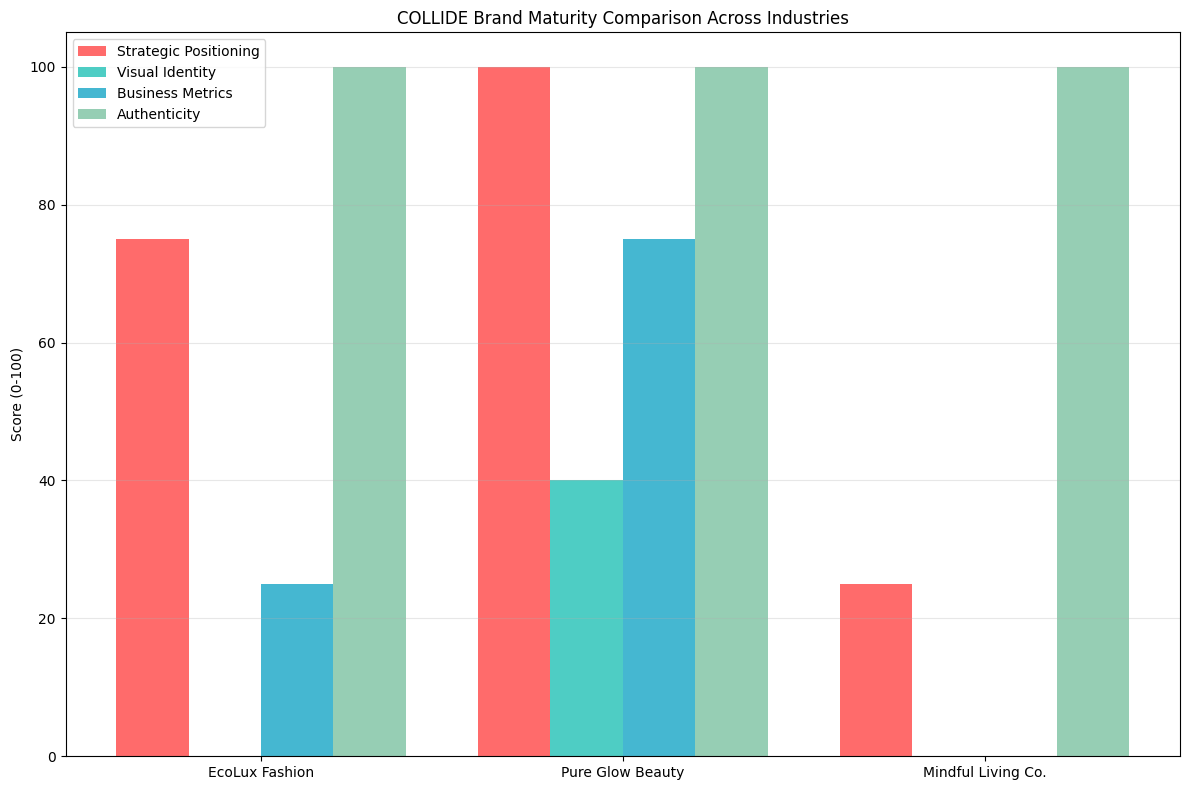


🎯 STRATEGIC RECOMMENDATIONS SUMMARY

ECOLUX FASHION:
  1. Develop comprehensive visual identity system
  2. Create detailed brand guidelines and style guide
  3. Implement business KPI tracking and financial projections
  4. Optimize revenue model and pricing strategy

PURE GLOW BEAUTY:
  1. Complete typography system selection
  2. Develop comprehensive brand guidelines
  3. Establish KPI tracking systems
  4. Enhance visual consistency across touchpoints

MINDFUL LIVING CO.:
  1. Conduct comprehensive market research
  2. Perform competitive landscape analysis
  3. Define unique value proposition clearly
  4. Develop complete visual identity from ground up
  5. Create business model and revenue projections
  6. Build community engagement strategy

✨ COLLIDE AI: TRANSFORMING AUTHENTIC VISIONS INTO SUCCESSFUL BRANDS
   The Brand-Shaping and Business Development AI
   for Creative Entrepreneurs in Fashion, Beauty, Lifestyle & Design


In [61]:
# Create comparative analysis visualization
import matplotlib.pyplot as plt

def create_brand_comparison_chart():
    """Create comparison chart of different brand assessments"""
    brands = ['EcoLux Fashion', 'Pure Glow Beauty', 'Mindful Living Co.']
    
    # Scores from our assessments
    strategic_scores = [75, 100, 25]
    visual_scores = [0, 40, 0]
    business_scores = [25, 75, 0]
    authenticity_scores = [100, 100, 100]
    
    x = np.arange(len(brands))
    width = 0.2
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    ax.bar(x - 1.5*width, strategic_scores, width, label='Strategic Positioning', color='#FF6B6B')
    ax.bar(x - 0.5*width, visual_scores, width, label='Visual Identity', color='#4ECDC4')
    ax.bar(x + 0.5*width, business_scores, width, label='Business Metrics', color='#45B7D1')
    ax.bar(x + 1.5*width, authenticity_scores, width, label='Authenticity', color='#96CEB4')
    
    ax.set_ylabel('Score (0-100)')
    ax.set_title('COLLIDE Brand Maturity Comparison Across Industries')
    ax.set_xticks(x)
    ax.set_xticklabels(brands)
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

create_brand_comparison_chart()

# Generate strategic recommendations for each brand
print("\n🎯 STRATEGIC RECOMMENDATIONS SUMMARY")
print("=" * 60)

recommendations = {
    'EcoLux Fashion': [
        "Develop comprehensive visual identity system",
        "Create detailed brand guidelines and style guide",
        "Implement business KPI tracking and financial projections",
        "Optimize revenue model and pricing strategy"
    ],
    'Pure Glow Beauty': [
        "Complete typography system selection",
        "Develop comprehensive brand guidelines",
        "Establish KPI tracking systems",
        "Enhance visual consistency across touchpoints"
    ],
    'Mindful Living Co.': [
        "Conduct comprehensive market research",
        "Perform competitive landscape analysis",
        "Define unique value proposition clearly",
        "Develop complete visual identity from ground up",
        "Create business model and revenue projections",
        "Build community engagement strategy"
    ]
}

for brand, recs in recommendations.items():
    print(f"\n{brand.upper()}:")
    for i, rec in enumerate(recs, 1):
        print(f"  {i}. {rec}")

print("\n" + "="*60)
print("✨ COLLIDE AI: TRANSFORMING AUTHENTIC VISIONS INTO SUCCESSFUL BRANDS")
print("   The Brand-Shaping and Business Development AI")
print("   for Creative Entrepreneurs in Fashion, Beauty, Lifestyle & Design")
print("="*60)

In [62]:
# Streamlit app entrypoint to run COLLIDE AI in the browser
import streamlit as st

st.set_page_config(page_title="COLLIDE AI Demo", page_icon="🤖", layout="wide")
st.title("COLLIDE AI – Brand Advisory Demo")
st.markdown("Click **Run Demo** to execute the consultation flow and view results.")

if st.button("Run Demo", type="primary"):
    results = run_collide_demo()
    st.success("Demo completed")
    st.subheader("Assessment")
    st.json(results.get("assessment", {}))
    st.subheader("Strategy")
    st.json(results.get("strategy", {}))
    st.subheader("Report")
    st.write(results.get("report", {}).get("executive_summary", ""))
else:
    st.info("Press the button to start the demo.")

2025-12-16 11:58:17.847 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 11:58:17.848 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 11:58:17.878 
  command:

    streamlit run /Users/jackietang/Library/Python/3.12/lib/python/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-12-16 11:58:17.879 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 11:58:17.879 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 11:58:17.879 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-16 11:58:17.880 Thread 'MainThread': missing ScriptRunContext! This warning can 